735 980


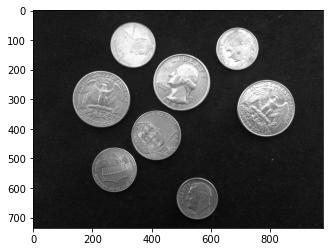

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

image = cv2.imread('coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
print(height, width)

plt.imshow(gray, cmap='gray')
plt.show()

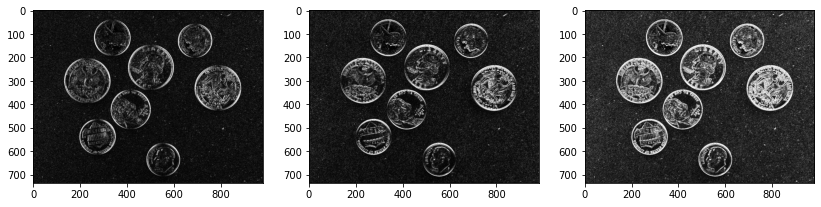

In [ ]:
img_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)


img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0);

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.imshow(img_sobel_x, cmap='gray')

plt.subplot(132)
plt.imshow(img_sobel_y, cmap='gray')

plt.subplot(133)
plt.imshow(img_sobel, cmap='gray')

plt.show()

245.0


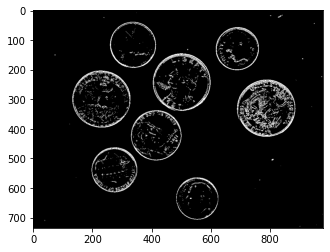

In [ ]:
threshold, binary_img = cv2.threshold(img_sobel, 245, 255, cv2.THRESH_BINARY)

print(threshold)
plt.imshow(binary_img, cmap='gray')
plt.show()

In [ ]:
def HoughCircles(input): 
    circles = []
    rows = input.shape[0] 
    cols = input.shape[1] 
    
    sinang = dict() 
    cosang = dict() 
    
    for angle in range(0,360): 
        sinang[angle] = np.sin(angle * np.pi/180) 
        cosang[angle] = np.cos(angle * np.pi/180) 
            
    length=int(rows/2)
    #radius = [i for i in range(5, length)]
    radius = [70, 75, 83, 84, 95]

    for r in radius:
        acc_cells = np.full((rows,cols),fill_value=0,dtype=np.uint64)

        for x in range(rows): 
            for y in range(cols): 
                if input[x][y] == 255:
                    for angle in range(0,360): 
                        b = y - round(r * sinang[angle]) 
                        a = x - round(r * cosang[angle]) 
                        if a >= 0 and a < rows and b >= 0 and b < cols: 
                            acc_cells[a][b] += 1
                             
        print('For radius: ',r)
        acc_cell_max = np.amax(acc_cells)
        print('max acc value: ',acc_cell_max)
        
        if(acc_cell_max > 250):  
            print("Detecting the circles")       
            
            acc_cells[acc_cells < 250] = 0  
               
            for i in range(rows): 
                for j in range(cols): 
                    if(i > 0 and j > 0 and i < rows-1 and j < cols-1 and acc_cells[i][j] >= 150):
                        avg_sum = np.float32((acc_cells[i][j]+acc_cells[i-1][j]+acc_cells[i+1][j]+acc_cells[i][j-1]+acc_cells[i][j+1]+acc_cells[i-1][j-1]+acc_cells[i-1][j+1]+acc_cells[i+1][j-1]+acc_cells[i+1][j+1])/9) 
                        if(avg_sum >= 33):
                            print("(x=",i,",","y=",j,")", "radius: ",r,"average: ",avg_sum,"\n")
                            circles.append((i,j,r))
                            acc_cells[i:i+5,j:j+7] = 0
    return circles

In [ ]:
def display_Circles(image, circles):
    for c in circles:
          cv2.circle(image,(c[1],c[0]),c[2],(0,255,0),1)
          cv2.rectangle(image,(c[1]-2,c[0]-2),(c[1]-2,c[0]-2),(0,0,255),3)
    return image

주어진 동전을 읽고 결과를 출력하시오

In [ ]:
circles = HoughCircles(binary_img)
copy_img = cv2.imread('coins.png')

img = display_Circles(copy_img, circles)
print(circles)

plt.imshow(img)


For radius:  70
max acc value:  339
Detecting the circles
(x= 130 , y= 689 ) radius:  70 average:  91.44444 

(x= 634 , y= 554 ) radius:  70 average:  134.77777 



KeyboardInterrupt: ignored